<h1>Data Connection Verification</h1>
Our data source is from the UC Irvine Machine Learning Repository and this script is written to check the avaliability and integrity of the data, so that users are able to reproduce our process.

In [15]:
import requests
import zipfile
import os
import hashlib

In [16]:
# Function to download the zipfile locally
 
def download_zip_file(url, local_filename):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status() # Raise an HTTPError for bad responses (4xx or 5xx)

        with open(local_filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"'{local_filename}' downloaded successfully.")
        return True
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")
        return False

In [17]:
# Link to dataset in Zip format
# Info page: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

zip_url = "https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip"
output_file_name = "breast+cancer+wisconsin+diagnostic.zip"
extract_to_directory = '../data'


if download_zip_file(zip_url, output_file_name):
    # Create the directory if it doesn't exist
    os.makedirs(extract_to_directory, exist_ok=True)

    with open(output_file_name, 'rb') as f:
        file_hash = hashlib.file_digest(f, 'md5').hexdigest()
        print(f"MD5 hash of the downloaded Zip file: {file_hash}")

    with zipfile.ZipFile(output_file_name, 'r') as zip_ref:
        zip_ref.extractall(extract_to_directory)

    with open('../data/wdbc.data', 'rb') as f:
        file_hash = hashlib.file_digest(f, 'md5').hexdigest()
        print(f"MD5 hash of the downloaded Data file: {file_hash}")
    
else:
    print("Download failed.")
    

'breast+cancer+wisconsin+diagnostic.zip' downloaded successfully.
MD5 hash of the downloaded Zip file: 97da86fb8aa67b905c88ad6c499f6bd4
MD5 hash of the downloaded Data file: c6dd5a2909808f3a901cf00cfd8dfff0


<h1>Breast Cancer Wisconsin - Dataset Analysis</h1>
This portion has snippets from our main code and used to double check that the newly downloaded source matches our current dataset.

In [18]:
%matplotlib inline 
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

In [19]:
# Read the dataset downloaded from provided link and stored in the 'data' directory in the git repository.
# The dataset is the Breast Cancer Wisconsin (Diagnostic) Data Set from UCI Machine Learning Repository

data = pd.read_csv('../data/wdbc.data', header=None)
# Display the shape of the dataset
print(f"The dataset has {data.shape[0]} rows (cases), and {data.shape[1]} columns, inlcuding ID and diagnosis.")

# Display the original column names, these are not the variable names, they are just numerical indices
print(f"The dataset column names in the original dataset form:")
print(data.columns)

The dataset has 569 rows (cases), and 32 columns, inlcuding ID and diagnosis.
The dataset column names in the original dataset form:
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')


In [20]:
# The names of columns in the dataset are not descriptive, so we will assign more meaningful variable names.
# These names are based on the dataset's description and should match the number of columns in the dataframe
# The dataset contains 32 columns, including the ID, diagnosis, and various features

# Define the variable names for the dataset
vname  = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']


# Assign the variable names to the dataframe
# This step is crucial for making the dataset more interpretable
data.columns = vname

# Verify the change of the variable names
data.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [21]:
# Display the information about the dataset
# This includes the data types of each column and the number of non-null entries
print(data.info())

# Display the first two and last two rows of the dataset
print(data.head(2))
print(data.tail(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

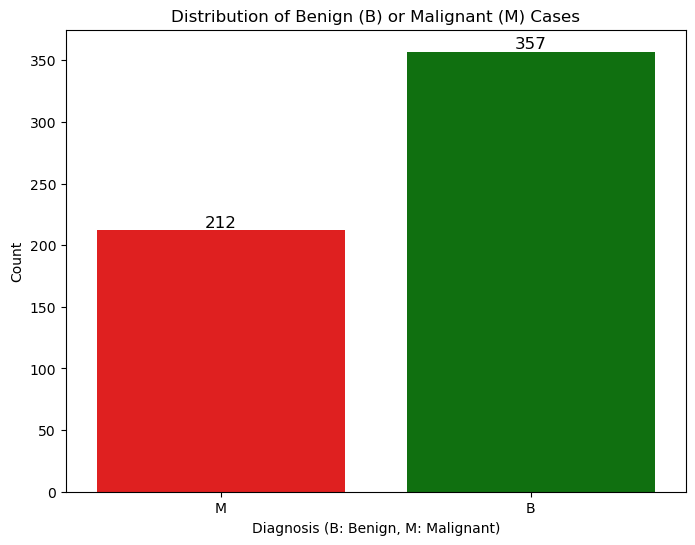

In [22]:
# Display the count of cases identified as benign or malignant based on the 'diagnosis' column
# This is a crucial step in understanding the distribution of cases in the dataset
# We use seaborn's countplot to visualize the distribution. We also define a custom color palette for better visualization.

# Create the countplot
plt.figure(figsize=(8, 6))
# Define a custom color palette for the diagnosis categories
# 'B' (Benign) is represented in green and 'M' (Malignant) in red
custom_palette = {'B': 'green', 'M': 'red'}
sns.countplot(x='diagnosis', data=data, hue='diagnosis', palette=custom_palette)

# Add count labels on top of the bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), int(p.get_height()), 
             ha='center', va='bottom', fontsize=12, color='black')

# Set the labels and title for the plot    
plt.xlabel('Diagnosis (B: Benign, M: Malignant)')
plt.ylabel('Count')
plt.title('Distribution of Benign (B) or Malignant (M) Cases')
plt.show()

In [23]:
# Display the descriptive statistics of the dataset
# This provides insights into the distribution of values in each column
# We focus on the columns from index 2 to 11, which contain the numerical features. We exclude the 'id' and 'diagnosis' columns.

print(data.iloc[:, 2:12].describe().round(2)) # Numberical features summary statistics is rounded to 2 decimal places for better readability


       radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count       569.00        569.00          569.00     569.00           569.00   
mean         14.13         19.29           91.97     654.89             0.10   
std           3.52          4.30           24.30     351.91             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.70         16.17           75.17     420.30             0.09   
50%          13.37         18.84           86.24     551.10             0.10   
75%          15.78         21.80          104.10     782.70             0.11   
max          28.11         39.28          188.50    2501.00             0.16   

       compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
count            569.00          569.00               569.00         569.00   
mean               0.10            0.09                 0.05           0.18   
std                0.05            0.08   

<h1>Conclusion</h1>
From the metadata observed, our newly downloaded dataset matches our current and we are confident the experiment can be reproduced at anytime.